# Fiddling about with a ThAr spectrum

In [10]:
%matplotlib notebook

In [100]:
# imports
from imp import reload
import numpy as np
from matplotlib import pyplot as plt

from scipy.interpolate import interp1d

from astropy.table import Table

from arclines.holy import utils as arch_utils
from arclines.holy import patterns as arch_patt

### Ryan's head start
    dispersion = 0.0207737, but varies from 0.01513672-0.02539062

## Load spectrum

In [6]:
spec = Table.read('ThAr_order.dat', format='ascii')

In [7]:
spec[0:5]

Amp,Mask
float64,float64
123.699002208,0.0
146.297296666,0.0
144.898493366,0.0
139.902062285,0.0
134.507523664,0.0


In [28]:
npix = len(spec)
npix

4608

### Plot

<IPython.core.display.Javascript object>


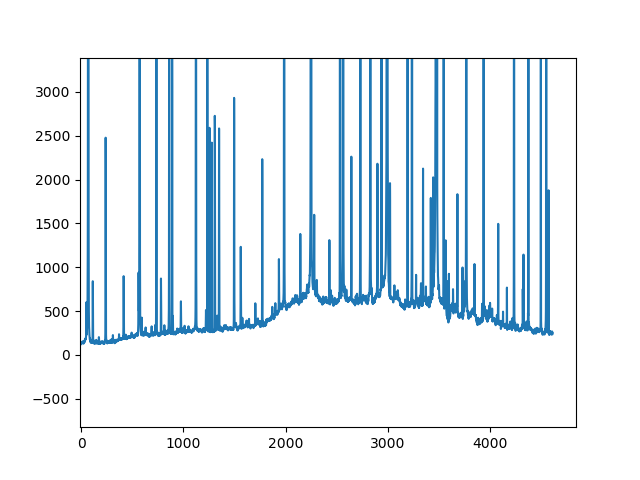

In [11]:
plt.clf()
ax = plt.gca()
ax.plot(spec['Amp'])
plt.show()

## Find lines

In [25]:
min_ampl = 500.

In [26]:
all_tcent, cut_tcent, icut = arch_utils.arc_lines_from_spec(spec['Amp'], min_ampl=min_ampl)

In [43]:
cut_tcent

array([   68.99142359,   113.48331851,   239.37516074,   415.3317666 ,
         561.32906692,   571.4645097 ,   735.24455602,   780.23724842,
         860.25902988,   889.1886349 ,  1122.02057338,  1233.21023743,
        1254.7408401 ,  1276.79906003,  1306.53440798,  1347.87368539,
        1495.30609497,  1559.73518558,  1770.19471548,  1933.19923538,
        1984.32214665,  2142.13108391,  2246.98274251,  2277.74515521,
        2426.21385446,  2529.88725955,  2560.32290983,  2640.91841529,
        2729.05229192,  2826.81866458,  2896.04982037,  2935.71643307,
        2990.36535694,  2991.85466797,  3019.11399274,  3190.94510642,
        3233.73309295,  3341.9039537 ,  3441.02536686,  3476.84564742,
        3543.86343013,  3562.84813516,  3677.80619477,  3764.9293156 ,
        3934.17396581,  4076.70413285,  4231.68877775,  4323.93317141,
        4371.71976891,  4493.72616805,  4546.24674055,  4568.41314314])

## Line list
    wave_no is in Vacuum
    wavelength is in Air

In [22]:
thar = Table.read('arclist.ThAr', format='ascii')
thar[0:5]

Wave_no.,wave,log(I),Elm,ion,Reference
float64,float64,float64,str2,str3,str1
33322.4046,3000.109256,0.45,Ar,II,W
33319.9704,3000.328442,-0.007,XX,0,P
33318.6726,3000.44531,1.22,Ar,II,W
33313.404,3000.919858,0.297,Th,II,P
33312.8136,3000.973041,0.026,XX,0,P


In [23]:
wvdata = thar['wave'].data

## Start guessing

In [48]:
best_dict = dict(nmatch=0, ibest=-1, bwv=0., min_ampl=min_ampl)

In [42]:
pix_tol = 1.

In [29]:
disp = 0.0207737  # Ang

In [49]:
wv_cen = 5000.

In [50]:
reload(arch_patt)
arch_patt.scan_for_matches(wv_cen, disp, npix, cut_tcent, wvdata,
                                      best_dict=best_dict, pix_tol=pix_tol, 
                           swv_uncertainty=10.,wvoff=100.)
best_dict

{'IDs': [0.0,
  0.0,
  0.0,
  5043.5155430000004,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'ampl': None,
 'bwv': 5084.0,
 'ibest': 23,
 'mask': array([False, False, False,  True, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False], dtype=bool),
 'midx': {0: {'matches': [1943]},
  1: {'matches': [1945, 1948, 1947]},
  2: {'matches': [1951, 1950, 1951, 1950]},
  3: {'matches': [

## Loop me

In [54]:
wvcens = np.arange(4500., 8000., 100)
wvcens

array([ 4500.,  4600.,  4700.,  4800.,  4900.,  5000.,  5100.,  5200.,
        5300.,  5400.,  5500.,  5600.,  5700.,  5800.,  5900.,  6000.,
        6100.,  6200.,  6300.,  6400.,  6500.,  6600.,  6700.,  6800.,
        6900.,  7000.,  7100.,  7200.,  7300.,  7400.,  7500.,  7600.,
        7700.,  7800.,  7900.])

In [59]:
best_dict = dict(nmatch=0, ibest=-1, bwv=0., min_ampl=min_ampl)
for iwvcen in wvcens:
    print("Working on wvcen={:f}".format(iwvcen))
    arch_patt.scan_for_matches(iwvcen, disp, npix, cut_tcent, wvdata,
                                      best_dict=best_dict, pix_tol=pix_tol, 
                           swv_uncertainty=10.,wvoff=100.)
    print("Nmatch = {:d}".format(best_dict['nmatch']))

Working on wvcen=4500.000000
Nmatch = 2
Working on wvcen=4600.000000
Nmatch = 3
Working on wvcen=4700.000000
Nmatch = 3
Working on wvcen=4800.000000
Nmatch = 3
Working on wvcen=4900.000000
Nmatch = 3
Working on wvcen=5000.000000
Nmatch = 3
Working on wvcen=5100.000000
Nmatch = 3
Working on wvcen=5200.000000
Nmatch = 7
Working on wvcen=5300.000000
Nmatch = 7
Working on wvcen=5400.000000
Nmatch = 7
Working on wvcen=5500.000000
Nmatch = 7
Working on wvcen=5600.000000
Nmatch = 7
Working on wvcen=5700.000000
Nmatch = 7
Working on wvcen=5800.000000
Nmatch = 7
Working on wvcen=5900.000000
Nmatch = 7
Working on wvcen=6000.000000
Nmatch = 7
Working on wvcen=6100.000000
Nmatch = 7
Working on wvcen=6200.000000
Nmatch = 7
Working on wvcen=6300.000000
Nmatch = 7
Working on wvcen=6400.000000
Nmatch = 7
Working on wvcen=6500.000000
Nmatch = 7
Working on wvcen=6600.000000
Nmatch = 7
Working on wvcen=6700.000000
Nmatch = 7
Working on wvcen=6800.000000
Nmatch = 7
Working on wvcen=6900.000000
Nmatch = 7


In [60]:
best_dict['bwv']

5204.0

## Refine?!

In [68]:
pix_tol = 1.
best_dict = dict(nmatch=0, ibest=-1, bwv=0., min_ampl=min_ampl)
arch_patt.scan_for_matches(5200., disp, npix, cut_tcent, wvdata,
                                      best_dict=best_dict, pix_tol=pix_tol, 
                           swv_uncertainty=10.,wvoff=100.)
best_dict['nmatch']

7

In [69]:
best_dict['scores']

array(['None', 'Amb', 'Amb', 'Amb', 'None', 'Amb', 'None', 'Amb', 'Amb',
       'Amb', 'Amb', 'Amb', 'None', 'None', 'None', 'None', 'None', 'None',
       'None', 'None', 'None', 'None', 'None', 'Amb', 'Amb', 'None', 'Amb',
       'Amb', 'None', 'None', 'None', 'None', 'None', 'None', 'Good', 'OK',
       'Good', 'Perf', 'Good', 'Amb', 'None', 'None', 'None', 'Amb',
       'Good', 'Amb', 'Amb', 'Good', 'Perf', 'None', 'None', 'None'], 
      dtype='<U4')

In [71]:
best_dict['bwv']

5204.0

## RC tells me central wavelength is close to 6000A
    Have cheated.  Answer is ~6060A

In [91]:
pix_tol = 2.
best_dict = dict(nmatch=0, ibest=-1, bwv=0., min_ampl=min_ampl)
arch_patt.scan_for_matches(6060., disp, npix, cut_tcent, wvdata,
                                      best_dict=best_dict, pix_tol=pix_tol, 
                           swv_uncertainty=10.,wvoff=10.)
best_dict['nmatch']

1

In [92]:
best_dict['scores']

array(['None', 'Amb', 'Amb', 'Amb', 'Amb', 'Amb', 'Amb', 'Amb', 'None',
       'None', 'Amb', 'Amb', 'Amb', 'None', 'Amb', 'Amb', 'Good', 'Amb',
       'Amb', 'Amb', 'Amb', 'None', 'None', 'None', 'None', 'None', 'None',
       'None', 'None', 'None', 'None', 'Amb', 'Amb', 'Amb', 'None', 'Amb',
       'None', 'None', 'None', 'None', 'None', 'Amb', 'Amb', 'Amb', 'None',
       'Risk', 'Amb', 'None', 'None', 'None', 'None', 'None'], 
      dtype='<U4')

In [93]:
IDs = np.array(best_dict['IDs'])

In [94]:
gd =  IDs > 0.

In [95]:
cut_tcent[gd], IDs[gd]

(array([ 1495.30609497]), array([ 6029.226527]))

In [96]:
best_dict['bwv']

6050.0

## Faux line list

In [99]:
soln = Table.read('solution.dat', format='ascii')
soln[0:5]

true_wv
float64
6005.85253906
6005.87792969
6005.90380859
6005.92919922
6005.95507812


In [101]:
fsoln = interp1d(np.arange(npix), soln['true_wv'], kind='cubic')

In [103]:
cheat_list = fsoln(cut_tcent)

In [107]:
pix_tol = 1.
best_dict = dict(nmatch=0, ibest=-1, bwv=0., min_ampl=min_ampl)
arch_patt.scan_for_matches(6060., disp, npix, cut_tcent, cheat_list,
                                      best_dict=best_dict, pix_tol=pix_tol, 
                           swv_uncertainty=10.,wvoff=10.)

In [108]:
best_dict['nmatch']

41

In [109]:
best_dict['scores']

array(['None', 'None', 'Good', 'Perf', 'Perf', 'Perf', 'Perf', 'Perf',
       'Perf', 'Perf', 'Perf', 'Perf', 'Perf', 'Perf', 'Perf', 'Perf',
       'Perf', 'Perf', 'Amb', 'Perf', 'Perf', 'Perf', 'Perf', 'Perf',
       'Perf', 'Perf', 'Perf', 'Perf', 'Perf', 'Perf', 'Good', 'Perf',
       'Good', 'Good', 'Good', 'Perf', 'Perf', 'Perf', 'Perf', 'Perf',
       'Perf', 'Perf', 'Good', 'Amb', 'Good', 'None', 'Amb', 'Risk',
       'None', 'None', 'None', 'None'], 
      dtype='<U4')